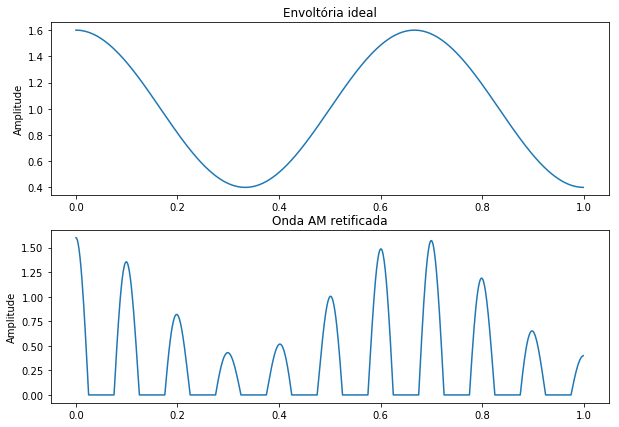

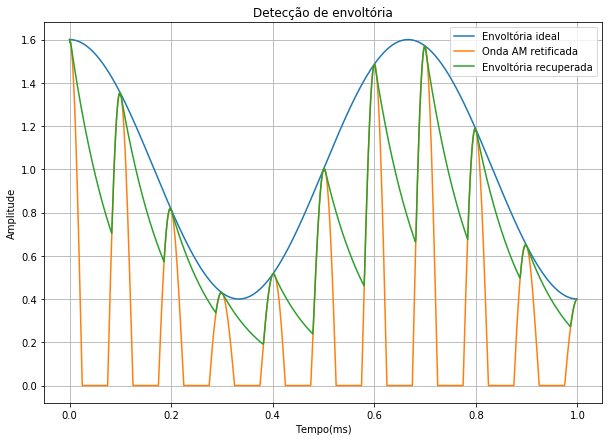

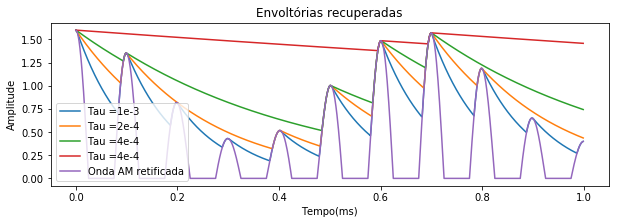

O erro para o tau =  0.0001  é  0.35602066777261904
O erro para o tau =  0.0002  é  0.2317210579929217
O erro para o tau =  0.0004  é  0.2510345666659728
O erro para o tau =  0.004  é  0.6404678486172435


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from sklearn.metrics import mean_squared_error
from math import sqrt

tau   = 1e-4  
tau_1 = 2e-4 
tau_2 = 4e-4 
tau_3 = 4e-3                                                    # Constante de tempo do detector de envelope
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM    = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env   = np.zeros(len(x_AM))
x_env_1 = np.zeros(len(x_AM))
x_env_2 = np.zeros(len(x_AM))
x_env_3 = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out

for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau_1)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env_1[i] = out
         
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau_2)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env_2[i] = out

for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau_3)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env_3[i] = out         
## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t*1000,x_envIdeal)                             
plt.title("Envoltória ideal")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(212)
plt.plot(t*1000,x_AM)                             
plt.title("Onda AM retificada")
plt.ylabel("Amplitude")

# gráfico composto
plt.figure(2,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada"])
plt.show()

plt.figure(3,[10,3])

plt.plot(t*1000,x_env) 
plt.plot(t*1000,x_env_1) 
plt.plot(t*1000,x_env_2) 
plt.plot(t*1000,x_env_3)
plt.plot(t*1000,x_AM) 
                             
plt.title("Envoltórias recuperadas")
plt.ylabel("Amplitude")
plt.legend(["Tau =1e-3","Tau =2e-4","Tau =4e-4","Tau =4e-4","Onda AM retificada"])
plt.xlabel("Tempo(ms)")
plt.show()

erro_1=sqrt(np.mean((-x_envIdeal+x_env)**2))
erro_2=sqrt(np.mean((-x_envIdeal+x_env_1)**2))
erro_3=sqrt(np.mean((-x_envIdeal+x_env_2)**2))
erro_4=sqrt(np.mean((-x_envIdeal+x_env_3)**2))

erro_11=sqrt(mean_squared_error(x_env, x_envIdeal))
erro_21=sqrt(mean_squared_error(x_env_1, x_envIdeal))
erro_31=sqrt(mean_squared_error(x_env_2, x_envIdeal))
erro_41=sqrt(mean_squared_error(x_env_3, x_envIdeal))

print('O erro para o tau = ', tau ,' é ', erro_11)
print('O erro para o tau = ', tau_1 ,' é ', erro_21)
print('O erro para o tau = ', tau_2 ,' é ', erro_31)
print('O erro para o tau = ', tau_3 ,' é ', erro_41)

A potência via Parserval é         =  (3+0j)
A potência via Autocorrelação é    =  3.0
A potência via Amostras no tempo é =  3.0
A potência via Variância é         =  3.0


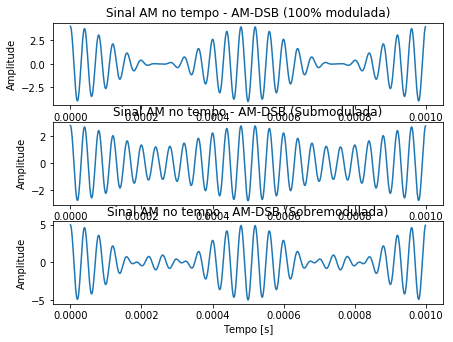

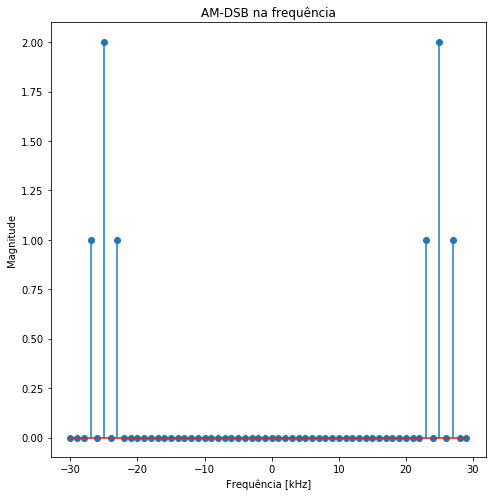

A potência máxima ocorre em  25000.0  Hz
A potência estimada é 2.00114263848


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from spectrum.window import Window
import scipy.signal as sci

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu_100 = 1 
Mu_sub = 0.4
Mu_sob = 1.5                                                     # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
Fs = 1/Ts
t = np.arange(N)*Ts
s_100 = Ac*(1+Mu_100*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s_sub = Ac*(1+Mu_sub*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s_sob = Ac*(1+Mu_sob*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f_100 = 2.0*np.abs((fftpack.fft(s_100)))/N                           # Cálculo da FFT
S_f_sub = 2.0*np.abs((fftpack.fft(s_sub)))/N  
S_f_sob = 2.0*np.abs((fftpack.fft(s_sob)))/N  
Ns_100 = len(s_100) 
Ns_sub = len(s_sub)       
Ns_sob = len(s_sob)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns_100)*k                                    # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f_100[kk]
    else :
        S_f_new[i] = S_f_100[Ns_100+kk]

# Potência via Parseval
Nfft = 1000                               # Número de pontos da FFT
Xfft=np.fft.fft(s_100,Nfft)               # Encontra a FFT
Xfft = Xfft/Nfft                          # Encontra a FFT 
Px_fft = np.sum(Xfft*np.conj(Xfft))       # Potência calculada

print('A potência via Parserval é         = ', Px_fft)
# Potẽncia via Autocorrelação
Rxx=np.correlate(s_100,s_100,'full')/len(s_100)  # Estima a autocorrelaçao de x(n)
Px_Rxx = Rxx[N-1] 
print('A potência via Autocorrelação é    = ', Px_Rxx)
# Potência vias amostras no tempo 
Px_tempo =(np.linalg.norm(s_100)**2)/N
print('A potência via Amostras no tempo é = ', Px_tempo)

# Potência via variância
Pvar = np.var(s_100)  
print('A potência via Variância é         = ', Px_tempo)
# Gráfico do AM-DSB no tempo
plt.figure(1,[7,7])
plt.subplot(411)
plt.plot(t,s_100)
plt.title("Sinal AM no tempo - AM-DSB (100% modulada)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

plt.subplot(412)
plt.plot(t,s_sub)
plt.title("Sinal AM no tempo - AM-DSB (Submodulada)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(t,s_sob)
plt.title("Sinal AM no tempo - AM-DSB (Sobremodulada)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")


# Gráfico do AM-DSB na frequência
plt.figure(2,[7,7])
#plt.subplot(414)
plt.title("AM-DSB na frequência")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f_new)
plt.tight_layout()
plt.show()


hamming = Window(len(s_100),name='hamming')
f,pxx = sci.periodogram(s_100,window=hamming.data,fs=Fs,nfft=len(s_100),scaling='spectrum')
pwrest = pxx.max()
idx = pxx.argmax()

print('A potência máxima ocorre em ',f[idx],' Hz')
print('A potência estimada é',pwrest)
